In [1]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np


## Exercise 0.0. Write down the probability p(d|β) of one distance d, given β.

$p(d| \beta) = \beta * e^{-\beta*d}$

## Exercise 0.1. Plot p(d|β) as a function of d, for some values of β.

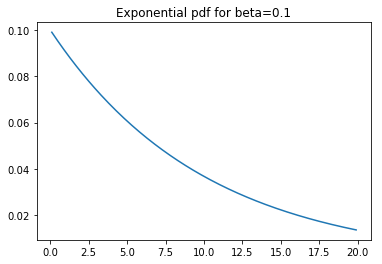

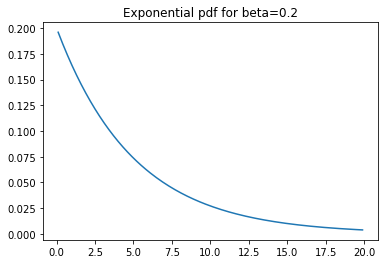

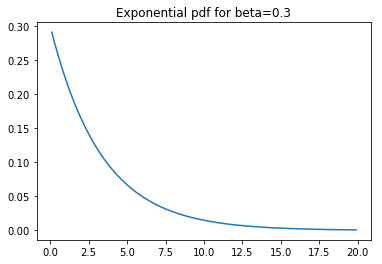

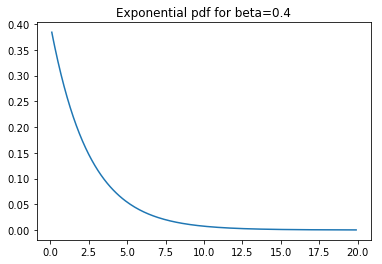

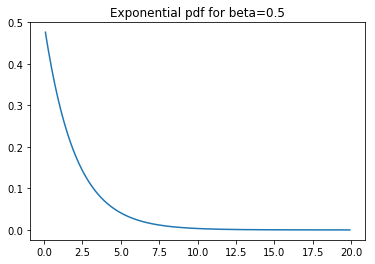

In [2]:
beta = np.arange(0.1, 0.6, 0.1)
dist =  np.arange(0.1, 20, 0.1)

for b in beta:
    label='Exponential pdf for beta='
    label+=str(b)
    prob = b*np.exp(-b*dist)
    plt.title(label)
    plt.plot(dist, prob)
    plt.show()

## Exercise 0.2. Plot p(d|β) as a function of β, for some values of d.

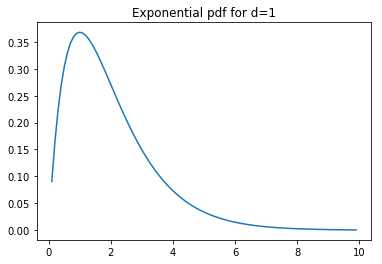

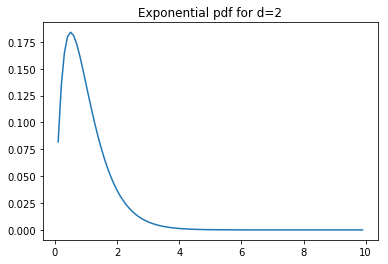

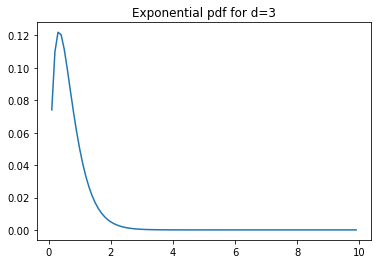

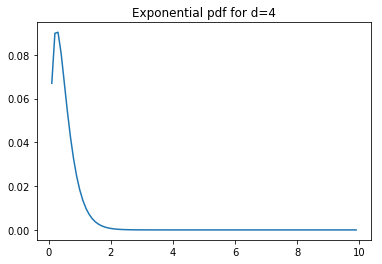

In [3]:
beta = np.arange(0.1, 10, 0.1)
dist = np.arange(1,5, 1)

for d in dist:
    label='Exponential pdf for d='
    label+=str(d)
    prob = beta*np.exp(-beta*d)
    plt.title(label)
    plt.plot(beta, prob)
    plt.show()

In [4]:
0.1*np.exp(-0.1*1)

0.09048374180359596

In [5]:
0.2*np.exp(-0.2*1)

0.16374615061559639

In [6]:
0.3*np.exp(-0.3*1)

0.22224546620451535

In [7]:
0.4*np.exp(-0.4*1)

0.26812801841425576

In [8]:
0.5*np.exp(-0.5*1)

0.30326532985631671

## Exercise 0.3. Plot p(d|β) as a function of both d and β.

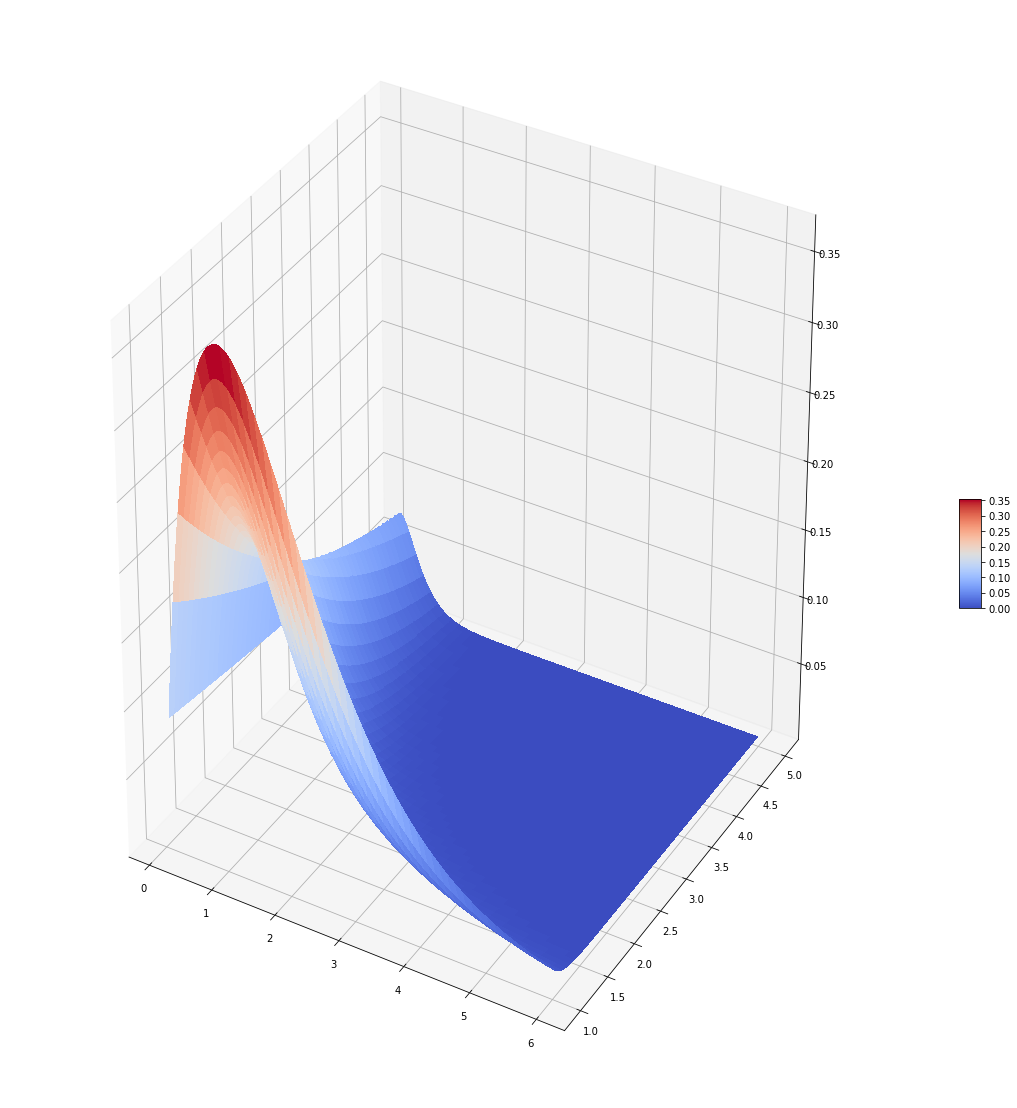

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

# Make data.
beta = np.arange(0.1, 6, 0.01)
dist = np.arange(1, 5, 0.01)
X, Y = np.meshgrid(beta, dist)
Z = X*np.exp(-X*Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.1, aspect=5)

plt.show()

## 1.1) Plot the likelihood function of each data point d n .

In [10]:
def expLikelihoodOnePoint(point, beta):
    likelihood = 0
    max_arg = 0
    for b in beta:
        new = b*np.exp(-b*point)
        if likelihood < new:
            likelihood = new 
            max_arg = b
    return max_arg, max_arg*np.exp(-max_arg*point)            

In [11]:
def plotLikelihoodPoint(point, beta):
    points = np.arange(1, 20, 0.1)
    b, prob = expLikelihoodOnePoint(point, beta)
    label='Exponential pdf for beta='
    label+=str(b)
    prob = b*np.exp(-b*points)
    plt.title(label)
    plt.plot(points, prob)
    plt.show()

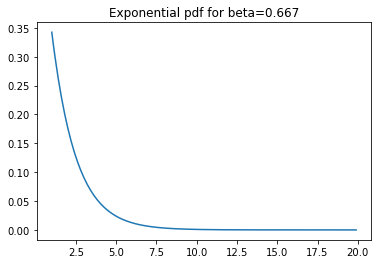

In [12]:
beta = np.arange(0.01, 50, 0.001)
plotLikelihoodPoint(1.5, beta)

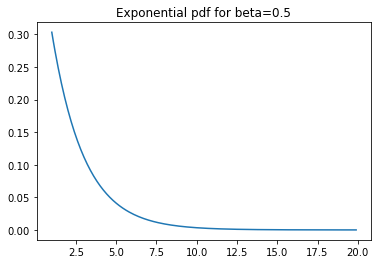

In [13]:
plotLikelihoodPoint(2, beta)

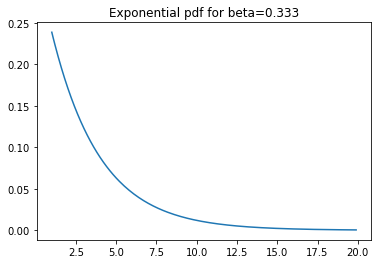

In [14]:
plotLikelihoodPoint(3, beta)

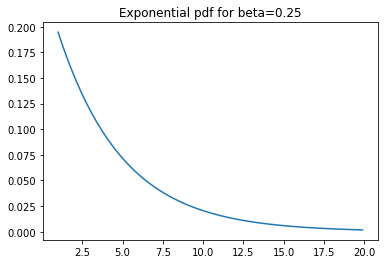

In [15]:
plotLikelihoodPoint(4, beta)

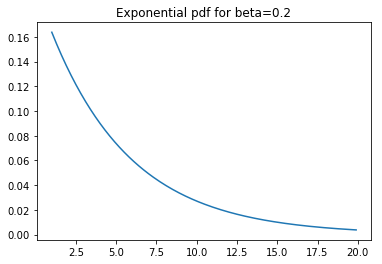

In [16]:
plotLikelihoodPoint(5, beta)

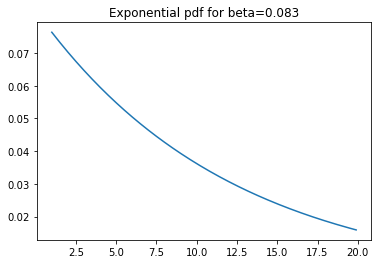

In [17]:
plotLikelihoodPoint(12, beta)

# 1.2) Plot the likelihood function of all data {d}.

In [18]:
def expLikelihood(points, betas):
    likelihood = 0
    max_arg = 0
    for b in beta:
        prob = 1
        for p in points:
            prob = prob * b*np.exp(-b*p)
        if likelihood < prob:
                likelihood = prob 
                max_arg = b
    return max_arg, prob

In [19]:
def plotLikelihood(points, betas):
    b, prob = expLikelihood(points, betas)
    points2 = np.arange(1, 20, 0.1)
    label='Exponential pdf for beta='
    label+=str(b)
    prob = b*np.exp(-b*points2)
    plt.title(label)
    plt.plot(points2, prob)
    plt.show()

In [20]:
beta = np.arange(0.001, 25, 0.001)
points = [1.5, 2, 3, 4, 5, 12]
expLikelihood(points,beta)

(0.218, 6.6377762525794488e-291)

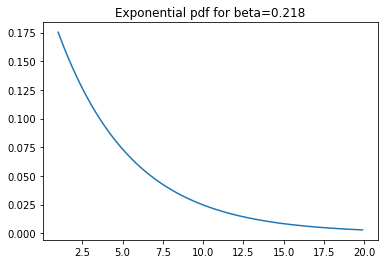

In [21]:
plotLikelihood(points, beta)